In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import datetime
import warnings
import random
from functools import reduce 
from os import walk
warnings.filterwarnings('ignore')

# <font color=orange>全量数据集获取</font>

In [2]:
def get_all_datas(ROOT_PATH):
    dataframe_list = list()
    for path, dirs, files in walk(ROOT_PATH):
        for csv in tqdm(files):
            dataframe_list.append(pd.read_csv(path + '/' + csv))
    all_datasets = pd.concat(dataframe_list)    #全量数据集
    print("全量数据集：" + str(all_datasets.shape))
    return all_datasets.reset_index(drop=True)

In [3]:
ROOT_PATH = 'E:/TianChi/2021数字汽车大赛/datas'    # 十张表要手动放到datas目录下
data_train = get_all_datas(ROOT_PATH)

100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


全量数据集：(6880557, 38)


# <font color=gree>数据探索</font>

In [4]:
data_train.head(3).append(data_train.tail(3))

,vin,时间,车速,车辆状态,充电状态,运行模式,总电压,总电流,累计里程,SOC,...,驱动电机转速,驱动电机转矩,驱动电机温度,驱动电机控制器温度,电机控制器输入电压,电机控制器直流母流电流,经度,维度,加速踏板行程值,制动踏板状态
0,LVCB4L4D3HM002839,2021-03-31 08:42:09,30.9,1.0,3.0,1.0,597.6,-43.1,107445.8,97.0,...,21004.0,1525.0,98.0,78.0,597.6,930.9,116367074.0,39849311.0,0.0,70.0
1,LVCB4L4D3HM002839,2021-03-31 08:44:09,0.0,1.0,3.0,1.0,601.4,0.0,107446.3,97.0,...,20000.0,2000.0,99.0,71.0,601.4,999.8,116372624.0,39849206.0,0.0,100.0
2,LVCB4L4D3HM002839,2021-03-31 08:44:24,1.1,1.0,3.0,1.0,601.3,14.7,107446.3,97.0,...,20057.0,2794.0,97.0,70.0,601.3,1013.3,116372624.0,39849206.0,34.0,0.0
6880554,LVCB4L4D4HM002803,2020-10-21 11:32:57,0.0,1.0,3.0,1.0,579.1,0.0,144216.7,74.0,...,20000.0,2000.0,97.0,77.0,579.1,999.0,116445573.0,39870107.0,0.0,100.0
6880555,LVCB4L4D4HM002803,2020-10-21 11:33:12,5.2,1.0,3.0,1.0,579.1,53.5,144216.7,74.0,...,20180.0,3157.0,96.0,77.0,579.1,1049.4,116445573.0,39870107.0,34.0,0.0
6880556,LVCB4L4D4HM002803,2020-10-21 11:33:27,11.5,1.0,3.0,1.0,580.7,-41.9,144216.7,74.0,...,20367.0,1274.0,95.0,78.0,580.7,959.3,116444806.0,39870101.0,0.0,3.0


In [5]:
data_train.isnull().any().sum()

36

In [6]:
# 查看缺失率大于50%的特征
have_null_fea_dict = (data_train.isnull().sum()/len(data_train)).to_dict()
print(have_null_fea_dict)
fea_null_moreThanHalf = {} # 存放缺失率大于一半的特征字典
for key,value in have_null_fea_dict.items():
    if value > 0.5:
        fea_null_moreThanHalf[key] = value

fea_null_moreThanHalf

{'vin': 0.0, '时间': 0.0, '车速': 0.19483916781737293, '车辆状态': 0.19063732776285408, '充电状态': 0.08762720808794985, '运行模式': 0.08762720808794985, '总电压': 0.08762720808794985, '总电流': 0.08762720808794985, '累计里程': 0.19483916781737293, 'SOC': 0.08762720808794985, '电池单体电压最高值': 0.0868278541984319, '最高电压电池单体代号': 0.08682756352429026, '电池单体电压最低值': 0.08682756352429026, '最低电压电池单体代号': 0.08682756352429026, '最高温度值': 0.08682756352429026, '最高温度探针单体代号': 0.08682756352429026, '最低温度值': 0.08682756352429026, '最低温度探针单体代号': 0.08682756352429026, '最高报警等级': 0.08682756352429026, 'DC_DC状态': 0.0886955808955583, '档位': 0.08682756352429026, '最高电压电池子系统号': 0.08682756352429026, '最低电压电池子系统号': 0.08682756352429026, '最高温度子系统号': 0.08682756352429026, '最低温度子系统号': 0.08682756352429026, '驱动电机个数': 0.08682756352429026, '驱动电机序号': 0.08682756352429026, '驱动电机状态': 0.10598226277320281, '驱动电机转速': 0.22596717097176872, '驱动电机转矩': 0.22596717097176872, '驱动电机温度': 0.22596717097176872, '驱动电机控制器温度': 0.22596717097176872, '电机控制器输入电压': 0.22596964170197267, '电机

{}

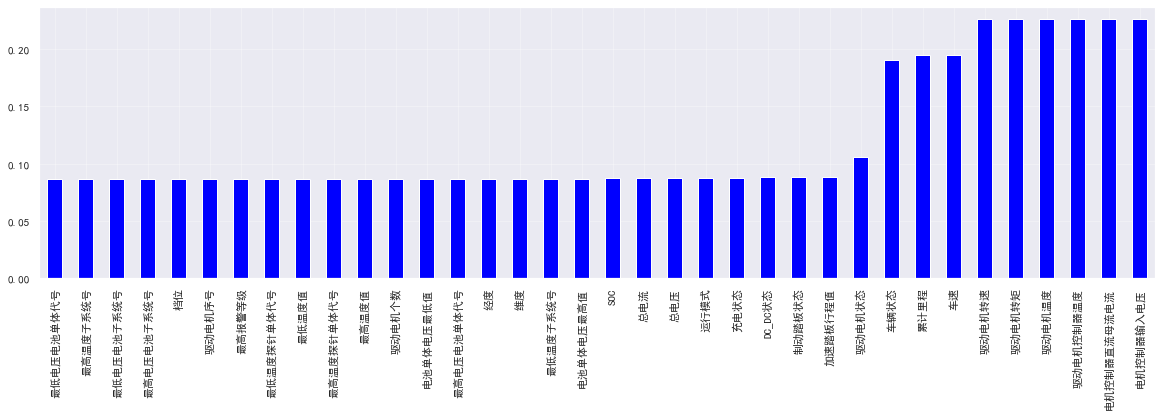

In [7]:
# 利用可视化简单查看一下特征的缺失率
missing = data_train.isnull().sum()/len(data_train)
missing = missing[missing>0]
missing.sort_values(inplace=True) # 升序
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题
plt.figure(figsize=(20,5))
missing.plot.bar(color="blue")
plt.grid(alpha =0.3)

In [8]:
# 查看数据集当中只有一种值的特征
one_kinds_column = [fea for fea in data_train.columns if data_train[fea].nunique() <= 1]
one_kinds_column

['运行模式',
 '最高电压电池子系统号',
 '最低电压电池子系统号',
 '最高温度子系统号',
 '最低温度子系统号',
 '驱动电机个数',
 '驱动电机序号']

In [9]:
data_train = data_train.drop(one_kinds_column, axis=1)
data_train.shape

(6880557, 31)

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880557 entries, 0 to 6880556
Data columns (total 31 columns):
 #   Column       Dtype  
---  ------       -----  
 0   vin          object 
 1   时间           object 
 2   车速           float64
 3   车辆状态         float64
 4   充电状态         float64
 5   总电压          float64
 6   总电流          float64
 7   累计里程         float64
 8   SOC          float64
 9   电池单体电压最高值    float64
 10  最高电压电池单体代号   float64
 11  电池单体电压最低值    float64
 12  最低电压电池单体代号   float64
 13  最高温度值        float64
 14  最高温度探针单体代号   float64
 15  最低温度值        float64
 16  最低温度探针单体代号   float64
 17  最高报警等级       float64
 18  DC_DC状态      float64
 19  档位           float64
 20  驱动电机状态       float64
 21  驱动电机转速       float64
 22  驱动电机转矩       float64
 23  驱动电机温度       float64
 24  驱动电机控制器温度    float64
 25  电机控制器输入电压    float64
 26  电机控制器直流母流电流  float64
 27  经度           float64
 28  维度           float64
 29  加速踏板行程值      float64
 30  制动踏板状态       float64
dtypes: float64(29), object(2

In [11]:
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
print(numerical_fea)
print(len(numerical_fea))
category_fea = list(filter(lambda x : x not in numerical_fea,list(data_train.columns)))
print(category_fea)  # 对象类型

['车速', '车辆状态', '充电状态', '总电压', '总电流', '累计里程', 'SOC', '电池单体电压最高值', '最高电压电池单体代号', '电池单体电压最低值', '最低电压电池单体代号', '最高温度值', '最高温度探针单体代号', '最低温度值', '最低温度探针单体代号', '最高报警等级', 'DC_DC状态', '档位', '驱动电机状态', '驱动电机转速', '驱动电机转矩', '驱动电机温度', '驱动电机控制器温度', '电机控制器输入电压', '电机控制器直流母流电流', '经度', '维度', '加速踏板行程值', '制动踏板状态']
29
['vin', '时间']


# <font color=gree>数据预处理</font>

## 1.缺失值处理

* 类别特征使用众数填充
* 连续特征使用中位数填充

## 2.时间特征处理

In [12]:
# 过滤数值型类别特征
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()  #获取不同值的个数
        if temp < 10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea

numerical_serial_fea, numerical_noserial_fea = get_numerical_serial_fea(data_train, numerical_fea)

In [13]:
print("连续型特征：", len(numerical_serial_fea))
print(numerical_serial_fea)
print('-' * 100)
print("离散型特征：", len(numerical_noserial_fea))
print(numerical_noserial_fea)

连续型特征： 23
['车速', '总电压', '总电流', '累计里程', 'SOC', '电池单体电压最高值', '最高电压电池单体代号', '电池单体电压最低值', '最低电压电池单体代号', '最高温度值', '最高温度探针单体代号', '最低温度值', '最低温度探针单体代号', '驱动电机转速', '驱动电机转矩', '驱动电机温度', '驱动电机控制器温度', '电机控制器输入电压', '电机控制器直流母流电流', '经度', '维度', '加速踏板行程值', '制动踏板状态']
----------------------------------------------------------------------------------------------------
离散型特征： 6
['车辆状态', '充电状态', '最高报警等级', 'DC_DC状态', '档位', '驱动电机状态']


In [14]:
# 按照中位数填充连续特征
data_train[numerical_fea] = data_train[numerical_fea].fillna(data_train[numerical_fea].median())
# 按照众数填充离散特征
data_train[category_fea] = data_train[category_fea].fillna(data_train[category_fea].mode())

In [15]:
# 再次查看缺失情况
data_train.isnull().sum()

vin            0
时间             0
车速             0
车辆状态           0
充电状态           0
总电压            0
总电流            0
累计里程           0
SOC            0
电池单体电压最高值      0
最高电压电池单体代号     0
电池单体电压最低值      0
最低电压电池单体代号     0
最高温度值          0
最高温度探针单体代号     0
最低温度值          0
最低温度探针单体代号     0
最高报警等级         0
DC_DC状态        0
档位             0
驱动电机状态         0
驱动电机转速         0
驱动电机转矩         0
驱动电机温度         0
驱动电机控制器温度      0
电机控制器输入电压      0
电机控制器直流母流电流    0
经度             0
维度             0
加速踏板行程值        0
制动踏板状态         0
dtype: int64

In [16]:
for fea in numerical_noserial_fea:
    print(data_train[fea].value_counts())
    print()

1.0    6522150
2.0     358407
Name: 车辆状态, dtype: int64

3.0    5966045
1.0     728042
4.0     186470
Name: 充电状态, dtype: int64

0.0    6773867
1.0      89968
2.0      12979
3.0       3743
Name: 最高报警等级, dtype: int64

1.0    6757886
2.0     122671
Name: DC_DC状态, dtype: int64

14.0    5315820
0.0     1499869
13.0      64868
Name: 档位, dtype: int64

4.0    5451821
3.0     938410
1.0     490326
Name: 驱动电机状态, dtype: int64



# <font color=red>时间特征处理</font>

## 十辆车按时间顺序进行排序，并且构造 'day' 'second' 特征，得到最后新的排序过后的数据集，，再构造 时间的变化量15s

In [17]:
def init_time_fea(data_train, car_dict):
    new_data_set_list = list()
    for k, v in tqdm(car_dict.items()):
        temp_data = data_train[data_train['vin']==k].reset_index(drop=True)
        temp_data = temp_data.sort_values('时间')
        temp_data['时间'] = pd.to_datetime(temp_data['时间'], format='%Y-%m-%d %H:%M:%S')
        startdate = datetime.datetime.strptime(str(list(temp_data['时间'])[0]), '%Y-%m-%d %H:%M:%S')
        temp_data['day'] = temp_data['时间'].apply(lambda x: x-startdate).dt.days
        temp_data['second'] = temp_data['时间'].apply(lambda x: x-startdate).dt.total_seconds()
        new_data_set_list.append(temp_data)
    data_sets_sort = pd.concat(new_data_set_list).reset_index(drop=True)
    print("排序过后的全量数据集：", data_sets_sort.shape)
    return data_sets_sort

data_sets_sort = init_time_fea(data_train ,dict(data_train['vin'].value_counts()))

100%|██████████| 10/10 [03:48<00:00, 22.84s/it]


排序过后的全量数据集： (6880557, 33)


In [18]:
# data_sets_sort.to_csv('E:/TianChi/2021数字汽车大赛/temp_df/datasets_sort.csv', index=False)

data_sets_sort[['day', 'second']]

,day,second
0,0,0.0
1,0,15.0
2,0,30.0
3,0,45.0
4,0,60.0
...,...,...
6880552,365,31598096.0
6880553,365,31598111.0
6880554,365,31598126.0
6880555,365,31598141.0


# <font color=orange>越级挂挡行为</font>

## <font color=pink>首先确定车速非0的情况，在离合到达脱离动力深度的情况下，未出现刹车信息的与空挡信息。通过获取当前当位值与上次档位值，将俩者的数值进行相减，若结果非0、-1、1的情况下，则判断为越级挂挡行为。由于在每次换挡过程中，会出现空档的情况。因此在检测方法过程中，需要排除撤档返回空档的情况影响。</font>

* 车速：城市内限速60
* 车辆状态：1启动，2熄火
* 驱动电机状态：1耗电，2发电，3关闭
* 驱动点击转速：在发动机转速出现骤升时或车辆速度明显降低时就匆忙越级加档或减档。可以考虑利用发动机转速在未换挡时变化是连续的。


# <font color=orange>空挡滑行行为</font>

## <font color=pink>通过检测空档档位与车辆当前车速进行组合来判断。首先是在射速非0的情况下，在检测到驾驶人将档位挂至空档后，在规定时间内，若检测此刻档位始终处于空档时，则判断该行为是空挡滑行行为。</font>

* 1.车速信息
    * 车速非0
* 2.离合信息
    * 离合达到脱离动力深度
* 3.刹车信息
    * 未出现刹车信号
* 4.档位信息
    * 出现空档信号，持续超过一定时间

['车速', '车辆状态', '档位']